In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from treelib import Node, Tree

In [2]:
data=pd.read_csv("house-votes-84.csv")

In [3]:
originalColumnNames=list(data.columns)

#### Rename Columns

In [4]:
Columns={}
index=0
for col in list(data.columns):
    Columns[col]="f"+str(index)
    index+=1

In [5]:
data=data.rename(columns=Columns)

#### Add label column

In [7]:
def getLabel(Class):
    if Class=="democrat":
        return 1
    else:
        return 0

In [8]:
data["Label"]=data.f0.apply(lambda x: getLabel(x))

In [9]:
data=data.drop(["f0"], axis=1)

### An Interesting Imputation Problem

The data set has many question marks, apparently when the congressmember did not vote on a particular bill.  Due to time constraints I chose to replace "?" with the majority vote within the party that a particular congressmember resides.

I do not think that this is the best possible imputation strategy, since there are some bills that do not have a strict party line vote.  A good example of this is the mx-missle bill.

In [121]:
print(originalColumnNames[9])
print("repubs")
print(republicans["f10"].value_counts())
print("dems")
print(democrats["f10"].value_counts())

 mx-missile
repubs
y    95
n    73
Name: f10, dtype: int64
dems
n    143
y    124
Name: f10, dtype: int64


Another interesting problem is how to efficiently implement this imputation strategy.  The method employed here is worst case and also a product of time constraints.

In [11]:
republicans=data[data["Label"]==0]
democrats=data[data["Label"]==1]

In [12]:
def majorityVote(colName, classLabel):
    yes=len(data[(data[colName]=="y") & (data["Label"]==classLabel)])
    no=len(data[(data[colName]=="n") & (data["Label"]==classLabel)])
    if yes >= no:
        return "y"
    else:
        return "n"

In [13]:
def fixQMark(value, colName, classLabel):
    if value=="?":
        return majorityVote(colName, classLabel)
    else:
        return value

I tried for about an hour to write a loop to iteratively impute the majority vote into all question marks.  Eventually, I settled on the brute force method.

In [16]:
democrats["f1"]=democrats.f1.apply(lambda x: fixQMark(x,"f1",1))

<ipython-input-16-e31660557eaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f1"]=democrats.f1.apply(lambda x: fixQMark(x,"f1",1))


In [17]:
democrats["f2"]=democrats.f2.apply(lambda x: fixQMark(x,"f2",1))

<ipython-input-17-a0eaecde054d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f2"]=democrats.f2.apply(lambda x: fixQMark(x,"f2",1))


In [18]:
democrats["f3"]=democrats.f3.apply(lambda x: fixQMark(x,"f3",1))

<ipython-input-18-748b479be083>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f3"]=democrats.f3.apply(lambda x: fixQMark(x,"f3",1))


In [19]:
democrats["f4"]=democrats.f4.apply(lambda x: fixQMark(x,"f4",1))

<ipython-input-19-8ed543c7f3f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f4"]=democrats.f4.apply(lambda x: fixQMark(x,"f4",1))


In [20]:
democrats["f5"]=democrats.f5.apply(lambda x: fixQMark(x,"f5",1))

<ipython-input-20-0cce43996513>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f5"]=democrats.f5.apply(lambda x: fixQMark(x,"f5",1))


In [21]:
democrats["f6"]=democrats.f6.apply(lambda x: fixQMark(x,"f6",1))

<ipython-input-21-760bbb6feec5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f6"]=democrats.f6.apply(lambda x: fixQMark(x,"f6",1))


In [22]:
democrats["f7"]=democrats.f7.apply(lambda x: fixQMark(x,"f7",1))

<ipython-input-22-faf3df19f4f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f7"]=democrats.f7.apply(lambda x: fixQMark(x,"f7",1))


In [23]:
democrats["f8"]=democrats.f8.apply(lambda x: fixQMark(x,"f8",1))

<ipython-input-23-1ee92386b9f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f8"]=democrats.f8.apply(lambda x: fixQMark(x,"f8",1))


In [24]:
democrats["f9"]=democrats.f9.apply(lambda x: fixQMark(x,"f9",1))

<ipython-input-24-b3b7f50168ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f9"]=democrats.f9.apply(lambda x: fixQMark(x,"f9",1))


In [25]:
democrats["f10"]=democrats.f10.apply(lambda x: fixQMark(x,"f10",1))

<ipython-input-25-9550cf089e70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f10"]=democrats.f10.apply(lambda x: fixQMark(x,"f10",1))


In [26]:
democrats["f11"]=democrats.f11.apply(lambda x: fixQMark(x,"f11",1))

<ipython-input-26-da3ce4407247>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f11"]=democrats.f11.apply(lambda x: fixQMark(x,"f11",1))


In [27]:
democrats["f12"]=democrats.f12.apply(lambda x: fixQMark(x,"f12",1))

<ipython-input-27-c18a259147f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f12"]=democrats.f12.apply(lambda x: fixQMark(x,"f12",1))


In [28]:
democrats["f13"]=democrats.f13.apply(lambda x: fixQMark(x,"f13",1))

<ipython-input-28-ac878813ebe0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f13"]=democrats.f13.apply(lambda x: fixQMark(x,"f13",1))


In [29]:
democrats["f14"]=democrats.f14.apply(lambda x: fixQMark(x,"f14",1))

<ipython-input-29-f2821b50479d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f14"]=democrats.f14.apply(lambda x: fixQMark(x,"f14",1))


In [30]:
democrats["f15"]=democrats.f15.apply(lambda x: fixQMark(x,"f15",1))

<ipython-input-30-436250cd56cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f15"]=democrats.f15.apply(lambda x: fixQMark(x,"f15",1))


In [31]:
democrats["f16"]=democrats.f16.apply(lambda x: fixQMark(x,"f16",1))

<ipython-input-31-c5a38feb0fec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrats["f16"]=democrats.f16.apply(lambda x: fixQMark(x,"f16",1))


In [33]:
republicans["f1"]=republicans.f1.apply(lambda x: fixQMark(x,"f1",0))

<ipython-input-33-a5c2ff1dbda8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f1"]=republicans.f1.apply(lambda x: fixQMark(x,"f1",0))


In [34]:
republicans["f2"]=republicans.f2.apply(lambda x: fixQMark(x,"f2",0))

<ipython-input-34-e8f4703ba83a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f2"]=republicans.f2.apply(lambda x: fixQMark(x,"f2",0))


In [35]:
republicans["f3"]=republicans.f3.apply(lambda x: fixQMark(x,"f3",0))

<ipython-input-35-cbade7a604d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f3"]=republicans.f3.apply(lambda x: fixQMark(x,"f3",0))


In [36]:
republicans["f4"]=republicans.f4.apply(lambda x: fixQMark(x,"f4",0))

<ipython-input-36-0d01cc4e0426>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f4"]=republicans.f4.apply(lambda x: fixQMark(x,"f4",0))


In [37]:
republicans["f5"]=republicans.f5.apply(lambda x: fixQMark(x,"f5",0))

<ipython-input-37-0b0b5fde5e67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f5"]=republicans.f5.apply(lambda x: fixQMark(x,"f5",0))


In [38]:
republicans["f6"]=republicans.f6.apply(lambda x: fixQMark(x,"f6",0))

<ipython-input-38-3e66f478cc61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f6"]=republicans.f6.apply(lambda x: fixQMark(x,"f6",0))


In [39]:
republicans["f7"]=republicans.f7.apply(lambda x: fixQMark(x,"f7",0))

<ipython-input-39-29d8fbb4a587>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f7"]=republicans.f7.apply(lambda x: fixQMark(x,"f7",0))


In [40]:
republicans["f8"]=republicans.f8.apply(lambda x: fixQMark(x,"f8",0))

<ipython-input-40-4c2369d7528e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f8"]=republicans.f8.apply(lambda x: fixQMark(x,"f8",0))


In [41]:
republicans["f9"]=republicans.f9.apply(lambda x: fixQMark(x,"f9",0))

<ipython-input-41-250707fd331b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f9"]=republicans.f9.apply(lambda x: fixQMark(x,"f9",0))


In [42]:
republicans["f10"]=republicans.f10.apply(lambda x: fixQMark(x,"f10",0))

<ipython-input-42-94047e4653ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f10"]=republicans.f10.apply(lambda x: fixQMark(x,"f10",0))


In [43]:
republicans["f11"]=republicans.f11.apply(lambda x: fixQMark(x,"f11",0))

<ipython-input-43-74f217e859ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f11"]=republicans.f11.apply(lambda x: fixQMark(x,"f11",0))


In [44]:
republicans["f12"]=republicans.f12.apply(lambda x: fixQMark(x,"f12",0))

<ipython-input-44-c049f1bf5720>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f12"]=republicans.f12.apply(lambda x: fixQMark(x,"f12",0))


In [45]:
republicans["f13"]=republicans.f13.apply(lambda x: fixQMark(x,"f13",0))

<ipython-input-45-71f2a1d91e9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f13"]=republicans.f13.apply(lambda x: fixQMark(x,"f13",0))


In [46]:
republicans["f14"]=republicans.f14.apply(lambda x: fixQMark(x,"f14",0))

<ipython-input-46-dbc8a753e5e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f14"]=republicans.f14.apply(lambda x: fixQMark(x,"f14",0))


In [47]:
republicans["f15"]=republicans.f15.apply(lambda x: fixQMark(x,"f15",0))

<ipython-input-47-d9e6c1f75abe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f15"]=republicans.f15.apply(lambda x: fixQMark(x,"f15",0))


In [48]:
republicans["f16"]=republicans.f16.apply(lambda x: fixQMark(x,"f16",0))

<ipython-input-48-1c49a7a2db78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republicans["f16"]=republicans.f16.apply(lambda x: fixQMark(x,"f16",0))


In [51]:
#weather=pd.concat([positive_df, negative_df], ignore_index=True)
data=pd.concat([republicans, democrats], ignore_index=True)

After putting the Republicans and Democrats data sets back together I was worried that the data set may not be randomized enough.  To fix this I took a random sample with the same length as the data set without replacement.  Essentially, this just randomly reorganizes the rows. 

In [53]:
data=data.sample(n=435, replace=False).reset_index()

In [54]:
data=data.drop(columns={"index"})

## The Decision Tree

### Preliminary Functions

In [56]:
def impurity(df, feature, value): # df is a dataframe, feature is the feature name as a string, value is boolean
    if len(df[df[feature]==value])==0:
        return 1
    else:
        return 1-(len(df[(df[feature]==value) & (df["Label"]==0)])/len(df[df[feature]==value]))**2-(len(df[(df[feature]==value) & (df["Label"]==1)])/len(df[df[feature]==value]))**2

In [57]:
def weightedImpurity(df, feature):
    return (len(df[df[feature]=="n"])/len(df))*impurity(df, feature, "n")+(len(df[df[feature]=="y"])/len(df))*impurity(df, feature, "y")

In [58]:
def purestFeature(df, labelColumnName, columnName):
    # Grab features that are not label
    features=set(df.columns).difference(set([labelColumnName, columnName]))
    # create dict with weighted impurity key and feature value
    featureImpurities={}
    for feature in features:
        featureImpurities[weightedImpurity(df, feature)]=feature
        
    return featureImpurities[np.array(list(featureImpurities.keys())).min()]

In [59]:
def isPure(df, labelColumnName):
    if (len(df)==df[labelColumnName].sum()) or (df[labelColumnName].sum()==0):
        return True
    else:
        return False

In [60]:
def value(df, labelColumnName):
    if not(isPure(df,labelColumnName)): # not pure
        num_ones=len(df[df[labelColumnName]==1])
        num_zeros=len(df[df[labelColumnName]==0])
        if max(num_ones,num_zeros)==num_ones:
            return 1
        else:
            return 0
    else: # pure
        return df.reset_index()[labelColumnName][0]

In [61]:
def unreconcilable(df): # needs to be generalized for any df
    numFeaturesAllOneValue=0
    features=set(df.columns).difference(set(["Label"]))
    for feature in features:
        if (len(df[df[feature]=="y"])==0) or (len(df[df[feature]=="n"])==0):
            numFeaturesAllOneValue+=1
    if numFeaturesAllOneValue==len(features):
        return True
    else:
        return False

### Train Test Split

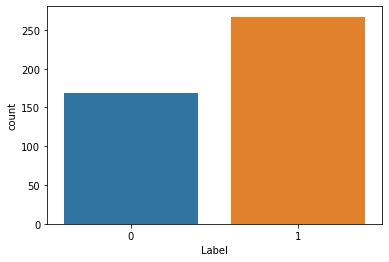

In [65]:
ax = sns.countplot(x="Label", data=data)

In [66]:
feature_columns=list(data.columns)

In [67]:
feature_columns.remove("Label")

In [71]:
rng=np.random.RandomState(2021111)

I learned the following method in CS 533.

In [74]:
#Slect the test data.
test=data.sample(frac=0.25, random_state=rng)

#Create boolean mask.
train_mask=pd.Series(True, index=data.index)

train_mask[test.index] = False

train = data[train_mask].copy()

### Fit the training data

In [75]:
def Fit(df): # assuming df does not start as pure
    tree=Tree()
    maxDepth=16 # will need to generalize 
    tree.create_node(purestFeature(df, "Label", "A"), "0", data=df)
    while tree.depth() <= maxDepth:
        numTerminalLeaves=0
        print(tree.leaves())
        for leaf in tree.leaves():
            DF=leaf.data
            if type(leaf.tag)==type("aa"):
                left=DF[DF[leaf.tag]=="y"]
                if isPure(left,"Label") or unreconcilable(left): # if left is terminal
                    tree.create_node(value(left, "Label"), leaf.identifier+"y",parent=leaf.identifier)  #leaf.identifier+"A"                  
                else:
                    tree.create_node(purestFeature(left, "Label", leaf.tag), leaf.identifier+"y",parent=leaf.identifier, data=left)
                
                # now do the same for right 
                right=DF[DF[leaf.tag]=="n"]
                if isPure(right,"Label") or unreconcilable(right): # if right is terminal
                    tree.create_node(value(right, "Label"), leaf.identifier+"n",parent=leaf.identifier)
                else:
                    tree.create_node(purestFeature(right, "Label", leaf.tag), leaf.identifier+"n", parent=leaf.identifier, data=right)
                
            else:
                numTerminalLeaves+=1
            # check to see if all leaves terminal
        if numTerminalLeaves==len(tree.leaves()):
            break
        continue
    return tree

It is interesting to see the data that is stored in each leaf as the tree is built.  The tree very efficiently sorts through the data.

Note that the identifier for each node gives a traversal from the root node labelled "0" to a that particular node.

In [76]:
T=Fit(train)

[Node(tag=f4, identifier=0, data=    f1 f2 f3 f4 f5 f6 f7 f8 f9 f10 f11 f12 f13 f14 f15 f16  Label
2    n  n  n  y  y  y  n  n  n   y   n   y   y   y   n   n      0
3    y  n  y  n  n  n  y  y  y   y   y   n   n   y   y   y      1
5    n  y  n  y  y  y  n  n  n   n   n   n   y   y   n   y      0
6    n  n  n  y  n  n  y  y  y   y   n   n   y   y   n   y      0
7    n  n  n  y  y  y  n  n  n   n   n   y   y   y   n   n      0
..  .. .. .. .. .. .. .. .. ..  ..  ..  ..  ..  ..  ..  ..    ...
428  n  n  n  y  y  y  n  n  n   y   y   y   y   y   n   y      0
429  y  y  y  n  n  n  y  y  y   n   y   n   n   n   y   y      1
430  y  y  n  y  y  y  n  n  n   n   y   n   y   y   n   y      1
431  n  y  n  y  y  y  n  n  n   n   n   y   y   y   n   n      0
432  y  n  y  n  n  y  y  y  y   n   n   y   n   y   y   y      1

[326 rows x 17 columns])]
[Node(tag=f11, identifier=0y, data=    f1 f2 f3 f4 f5 f6 f7 f8 f9 f10 f11 f12 f13 f14 f15 f16  Label
2    n  n  n  y  y  y  n  n  n   y   n   y   y 

[Node(tag=1, identifier=0ny, data=None), Node(tag=1, identifier=0nny, data=None), Node(tag=f2, identifier=0yyyy, data=    f1 f2 f3 f4 f5 f6 f7 f8 f9 f10 f11 f12 f13 f14 f15 f16  Label
50   n  y  y  y  y  y  n  n  n   y   y   y   y   y   y   y      1
162  n  n  y  y  y  y  y  n  n   y   y   y   y   y   n   y      0
273  n  y  y  y  y  y  n  n  n   n   y   y   n   y   n   n      1
277  y  n  y  y  y  y  y  y  n   y   y   y   n   y   y   y      0
284  y  y  y  y  y  y  n  n  n   n   y   y   y   y   n   y      1), Node(tag=f13, identifier=0yyyn, data=    f1 f2 f3 f4 f5 f6 f7 f8 f9 f10 f11 f12 f13 f14 f15 f16  Label
81   y  y  n  y  y  y  n  n  n   n   y   y   y   y   n   y      0
103  y  y  n  y  y  y  n  n  n   n   y   y   y   y   n   n      0
113  n  y  n  y  y  y  n  n  n   n   y   y   y   y   n   y      0
125  n  y  n  y  y  y  n  n  n   n   y   y   n   y   n   n      1
126  n  y  n  y  y  y  n  n  n   n   y   y   y   y   n   y      0
235  n  n  n  y  y  y  n  n  n   n   y   y   y   y 

I had an issue with the index so I reindexed here.

In [107]:
test=test.reset_index()
test=test.drop(["index"], axis=1)
test=test.drop(["level_0"], axis=1)
test.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,Label
0,y,n,y,n,n,y,y,y,y,y,y,n,n,n,y,y,1
1,y,y,y,n,n,n,y,y,y,n,n,n,y,n,y,y,1
2,y,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n,1
3,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y,1
4,y,y,n,n,n,n,y,y,y,n,y,n,n,n,y,y,1


### Predict the test data

My evaluate function iteratively builds the identifier for the leaf node that contains the predicted label for a particular observation.

In [111]:
def evaluate(tree, df, rowIndex):
    id="0"
    while type(tree.get_node(id).tag)==type("aa"):
        id=id+df.iloc[rowIndex][tree.get_node(id).tag]
    
    return tree.get_node(id).tag

In [112]:
def Predict(tree, df):
    predList=[]
    for rowIndex in df.index:
        predList.append(evaluate(tree, df, rowIndex))    
    return np.array(predList)

In [114]:
y_pred=Predict(T, test)

In [116]:
y_test=test["Label"].to_numpy()

## Accuracy

In [117]:
(y_pred==y_test).sum()/len(y_test)

0.926605504587156